In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [2]:
np.random.seed(1)

In [3]:
LR = np.loadtxt('result_LR_median.dat')
RF = np.loadtxt('result_RF_median.dat')
ER = np.loadtxt('result_ER_LAD_median.dat')

In [4]:
# number of data sets
n = LR.shape[1]
print(n)

## accuracy
acc = np.zeros((3,n))

30


In [5]:
def ranking_methods(acc,alpha=0.):
    n1,n2,n3 = np.zeros(3),np.zeros(3),np.zeros(3)

    ## for each data
    #j = 0
    for j in range(n):
        #print('j:',acc[:,j])
        acc_max,acc_min = max(acc[:,j]),min(acc[:,j])

        if acc_max <= (1+2*alpha)*acc_min:
            n1[:] +=1
        else:
            for i in range(3):
                if acc[i,j] >= (1-alpha)*acc_max:
                    n1[i] += 1
                elif acc[i,j] <= (1+alpha)*acc_min:
                    n3[i] += 1
                else:
                    n2[i] += 1

    print('n1:',n1)
    #print('n2:',n2)
    #print('n3:',n3)
    
    return n1,n2,n3

### Accuracy

In [6]:
# accuracy:
acc[0,:],acc[1,:],acc[2,:] = LR[0,:],RF[0,:],ER[0,:]
acc_av = acc.mean(axis=1)
acc_std = acc.std(axis=1)
print('accuracy mean:',acc_av)
print('accuracy std:',acc_std)
n1,n2,n3 = ranking_methods(acc,alpha=0.)

accuracy mean: [0.8880063  0.89639927 0.90508067]
accuracy std: [0.10696812 0.09586381 0.09855171]
n1: [10. 11. 19.]


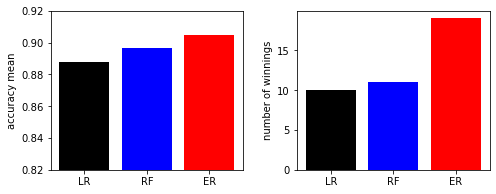

In [7]:
nx,ny = 2,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))
   
xvalue = [0,1,2]
labels = ['LR','RF','ER']

ax[0].bar(0,acc_av[0],color='k',width=0.8,label='LR')
ax[0].bar(1,acc_av[1],color='b',width=0.8,label='RF')
ax[0].bar(2,acc_av[2],color='r',width=0.8,label='ER')
ax[0].set_xticks(xvalue)
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('accuracy mean')
ax[0].set_ylim([0.82,0.92])

ax[1].bar(0,n1[0],color='k',width=0.8,label='LR')
ax[1].bar(1,n1[1],color='b',width=0.8,label='RF')
ax[1].bar(2,n1[2],color='r',width=0.8,label='ER')
ax[1].set_xticks(xvalue)
ax[1].set_xticklabels(labels)
ax[1].set_ylabel('number of winnings')
#ax[0].legend()

plt.tight_layout(h_pad=1, w_pad=2.)
#plt.savefig('fig1.pdf', format='pdf', dpi=100)

### ROC_AUC

In [8]:
# roc:
acc[0,:],acc[1,:],acc[2,:] = LR[1,:],RF[1,:],ER[1,:]
acc_av = acc.mean(axis=1)
acc_std = acc.std(axis=1)
print('ROC AUC mean:',acc_av)
print('ROC AUC std:',acc_std)
n1,n2,n3 = ranking_methods(acc,alpha=0.)

ROC AUC mean: [0.8287662  0.83961707 0.85264547]
ROC AUC std: [0.12514798 0.11794266 0.1127152 ]
n1: [ 7. 12. 19.]


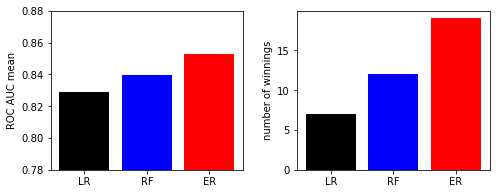

In [9]:
nx,ny = 2,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))
   
xvalue = [0,1,2]
labels = ['LR','RF','ER']

ax[0].bar(0,acc_av[0],color='k',width=0.8,label='LR')
ax[0].bar(1,acc_av[1],color='b',width=0.8,label='RF')
ax[0].bar(2,acc_av[2],color='r',width=0.8,label='ER')
ax[0].set_xticks(xvalue)
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('ROC AUC mean')
ax[0].set_ylim([0.78,0.88])

ax[1].bar(0,n1[0],color='k',width=0.8,label='LR')
ax[1].bar(1,n1[1],color='b',width=0.8,label='RF')
ax[1].bar(2,n1[2],color='r',width=0.8,label='ER')
ax[1].set_xticks(xvalue)
ax[1].set_xticklabels(labels)
ax[1].set_ylabel('number of winnings')
#ax[0].legend()

plt.tight_layout(h_pad=1, w_pad=2.)
#plt.savefig('fig1.pdf', format='pdf', dpi=100)

### Precision

In [10]:
# precision :
acc[0,:],acc[1,:],acc[2,:] = LR[2,:],RF[2,:],ER[2,:]
acc_av = acc.mean(axis=1)
acc_std = acc.std(axis=1)
print('precision mean:',acc_av)
print('precision std:',acc_std)
n1,n2,n3 = ranking_methods(acc,alpha=0.)

precision mean: [0.8347952  0.84690443 0.8508199 ]
precision std: [0.14104332 0.12135254 0.13234336]
n1: [14. 14. 17.]


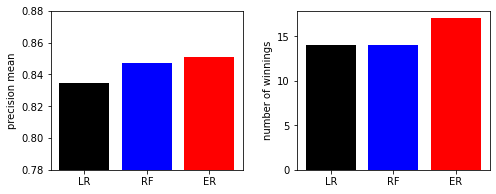

In [11]:
nx,ny = 2,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))
   
xvalue = [0,1,2]
labels = ['LR','RF','ER']

ax[0].bar(0,acc_av[0],color='k',width=0.8,label='LR')
ax[0].bar(1,acc_av[1],color='b',width=0.8,label='RF')
ax[0].bar(2,acc_av[2],color='r',width=0.8,label='ER')
ax[0].set_xticks(xvalue)
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('precision mean')
ax[0].set_ylim([0.78,0.88])

ax[1].bar(0,n1[0],color='k',width=0.8,label='LR')
ax[1].bar(1,n1[1],color='b',width=0.8,label='RF')
ax[1].bar(2,n1[2],color='r',width=0.8,label='ER')
ax[1].set_xticks(xvalue)
ax[1].set_xticklabels(labels)
ax[1].set_ylabel('number of winnings')
#ax[0].legend()

plt.tight_layout(h_pad=1, w_pad=2.0)
#plt.savefig('fig1.pdf', format='pdf', dpi=100)

### Recall

In [12]:
# recall :
acc[0,:],acc[1,:],acc[2,:] = LR[3,:],RF[3,:],ER[3,:]
acc_av = acc.mean(axis=1)
acc_std = acc.std(axis=1)
print('recall mean:',acc_av)
print('recall std:',acc_std)
n1,n2,n3 = ranking_methods(acc,alpha=0.)

recall mean: [0.8362014  0.83608183 0.8612654 ]
recall std: [0.13872877 0.14308349 0.12708697]
n1: [11. 11. 17.]


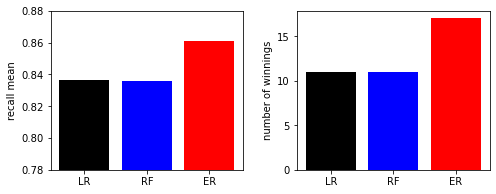

In [13]:
nx,ny = 2,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))
   
xvalue = [0,1,2]
labels = ['LR','RF','ER']

ax[0].bar(0,acc_av[0],color='k',width=0.8,label='LR')
ax[0].bar(1,acc_av[1],color='b',width=0.8,label='RF')
ax[0].bar(2,acc_av[2],color='r',width=0.8,label='ER')
ax[0].set_xticks(xvalue)
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('recall mean')
ax[0].set_ylim([0.78,0.88])

ax[1].bar(0,n1[0],color='k',width=0.8,label='LR')
ax[1].bar(1,n1[1],color='b',width=0.8,label='RF')
ax[1].bar(2,n1[2],color='r',width=0.8,label='ER')
ax[1].set_xticks(xvalue)
ax[1].set_xticklabels(labels)
ax[1].set_ylabel('number of winnings')
#ax[0].legend()

plt.tight_layout(h_pad=1, w_pad=2.0)
#plt.savefig('fig1.pdf', format='pdf', dpi=100)

### F1 Score

In [14]:
# f1 score :
acc[0,:],acc[1,:],acc[2,:] = LR[4,:],RF[4,:],ER[4,:]
acc_av = acc.mean(axis=1)
acc_std = acc.std(axis=1)
print('f1_score mean:',acc_av)
print('f1_score std:',acc_std)
n1,n2,n3 = ranking_methods(acc,alpha=0.)

f1_score mean: [0.82904403 0.8369398  0.8504635 ]
f1_score std: [0.12565149 0.1209106  0.11382722]
n1: [ 6. 11. 17.]


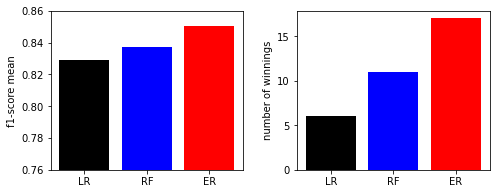

In [15]:
nx,ny = 2,1
nfig = nx*ny
fig, ax = plt.subplots(ny,nx,figsize=(nx*3.5,ny*2.8))
   
xvalue = [0,1,2]
labels = ['LR','RF','ER']

ax[0].bar(0,acc_av[0],color='k',width=0.8,label='LR')
ax[0].bar(1,acc_av[1],color='b',width=0.8,label='RF')
ax[0].bar(2,acc_av[2],color='r',width=0.8,label='ER')
ax[0].set_xticks(xvalue)
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('f1-score mean')
ax[0].set_ylim([0.76,0.86])

ax[1].bar(0,n1[0],color='k',width=0.8,label='LR')
ax[1].bar(1,n1[1],color='b',width=0.8,label='RF')
ax[1].bar(2,n1[2],color='r',width=0.8,label='ER')
ax[1].set_xticks(xvalue)
ax[1].set_xticklabels(labels)
ax[1].set_ylabel('number of winnings')
#ax[0].legend()

plt.tight_layout(h_pad=1, w_pad=2.0)
#plt.savefig('fig1.pdf', format='pdf', dpi=100)